In [60]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np                     
import matplotlib.pyplot as plt
import os

In [61]:
import cv2 as cv
import random
import torchvision
import glob

In [62]:
import time 
import pickle
import pandas as pd
from pathlib import Path
from PIL import Image
import h5py
from pathlib import Path
import json
from os import listdir
import itertools

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [64]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

print('done loading')

done loading


In [65]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D,Dropout,Activation,LeakyReLU
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array,ImageDataGenerator 
from tensorflow.keras.preprocessing import image  
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
print('done loading')

done loading


In [66]:
def folders_in_path(path): #takes path as input
    if not Path.is_dir(path): #checks if path exsist
        raise ValueError("argument is not directory") #produses error
        #if not in directory
    yield from filter(Path.is_dir,path.iterdir())
def folders_in_depth(path,depth):
    if 0>depth:
        raise ValueError("depth smaller 0")
    if 0==depth:
        yield from folders_in_path(path)
    else:
        for folder in folders_in_path(path):
            yield from folders_in_depth(folder,depth-1)
def files_in_path(path):
    if not Path.is_dir(path):
        raise ValueError("argument is not a directory")
    yield from filter(Path.is_file,path.iterdir())
def sum_file_size(filepaths):
    return sum([filep.stat().st_size for filep in filepaths])
def convert_image_to_array(image_dir):
    try:
        image = cv.imread(image_dir)
        if image is not None :
            image = cv.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None 
  

In [67]:
def load_train(path):
    images = []
    for label in labels:
        direc = os.path.join(path, label)
        class_num = labels.index(label)
        for image in os.listdir(direc):
            image_read = cv.imread(os.path.join(direc,image),cv.IMREAD_GRAYSCALE)
            image_resized = cv.resize(image_read,(image_size,image_size))
            images.append([image_resized,class_num])
            
    return np.array(images)
 

In [68]:
# looking into complete folder to understand number of images 
path = 'C:\\Users\\ACER\\Desktop\\Emotion_detection\\train_trim\\'
train = os.listdir(path)
folders=[]
folders = [f for f in sorted(os.listdir(path))]
print(folders)
labels = folders
print (f'The labels are {labels}')
image_size = 56
train_images = load_train(path)
X = []
y = []
for feature, label in train_images:
    X.append(feature)
    y.append(label)
print('Done loading all images')    
print (f'Length of X = {len(X)}')
print (f'Length of y = {len(y)}')
## checking the number of images of each class
a = 0
b = 0
c = 0
d = 0
e = 0
for label in y:
   if label == 0:
        a += 1
   if label == 1:
       b += 1
   if label == 2:
       c += 1
   if label == 3:
       d += 1
   if label == 4:
       e += 1
#        
print (f'Number of class 1 images = {a}')
print (f'Number of class 2 images = {b}')
print (f'Number of class 3 images = {c}')
 


['angry', 'happy', 'sad', 'surprise']
The labels are ['angry', 'happy', 'sad', 'surprise']
Done loading all images
Length of X = 19300
Length of y = 19300
Number of class 1 images = 3993
Number of class 2 images = 7164
Number of class 3 images = 4938


In [69]:
train_path=path
EPOCHS = 10 #50
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((156, 156))
image_size = 0
width=156
height=156
depth=1

In [70]:
image_list, label_list = [], []
train_labels=os.listdir(train_path) #take training path labels
train_labels.sort() #sort the labels
print(train_labels) #primt the lables
global_features=[] #initialize variable to combine all features
labels=[] #create label variables so as to decode text to number
total=0 #initialize
tot_file=[] #initialize
count=1 #start count to check number of images
i=0
j=0
k=0
print(Path.cwd()) #gives the current path

['angry', 'happy', 'sad', 'surprise']
C:\Users\ACER\Desktop\Emotion_detection


In [71]:
for folder in folders_in_depth(Path.cwd(),1):
        #first loop will pick the first foldend then next folder
        files=list(files_in_path(folder)) #list all files in folder
        file=len(files) #length of files
        tot_file.append(file) #because we are running for all folder
        # we are appending all files in tot_file at the end we
        #shall get the list of number of files in the folder
        #we are doing this because every folder has different number of files
        #at the end when we are trainig all class of disease have to be
        #trained equally, hence find the least number of images in the folder
        #and then train accordingly
        total_size=sum_file_size(files)
        #total size of files
        count=count+1 #check total number of files executed
        print(f'{folder}:filecount:{len(files)},total size:{total_size}')

C:\Users\ACER\Desktop\Emotion_detection\.idea\inspectionProfiles:filecount:1,total size:174
C:\Users\ACER\Desktop\Emotion_detection\gcn1\conda-meta:filecount:61,total size:11459445
C:\Users\ACER\Desktop\Emotion_detection\gcn1\DLLs:filecount:34,total size:10595549
C:\Users\ACER\Desktop\Emotion_detection\gcn1\include:filecount:102,total size:656144
C:\Users\ACER\Desktop\Emotion_detection\gcn1\Lib:filecount:172,total size:4325196
C:\Users\ACER\Desktop\Emotion_detection\gcn1\Library:filecount:0,total size:0
C:\Users\ACER\Desktop\Emotion_detection\gcn1\libs:filecount:3,total size:512288
C:\Users\ACER\Desktop\Emotion_detection\gcn1\Scripts:filecount:83,total size:13221247
C:\Users\ACER\Desktop\Emotion_detection\gcn1\share:filecount:0,total size:0
C:\Users\ACER\Desktop\Emotion_detection\gcn1\sip:filecount:0,total size:0
C:\Users\ACER\Desktop\Emotion_detection\gcn1\tcl:filecount:6,total size:1600642
C:\Users\ACER\Desktop\Emotion_detection\gcn1\Tools:filecount:0,total size:0
C:\Users\ACER\Deskt

In [72]:
tot_file.sort() #sort files based on ascending order
num = tot_file[1]#tot_file[2] #Index 0 is junkhence extract index 1
print('tOTAL FILE:',tot_file)
print(num) 

tOTAL FILE: [0, 0, 0, 0, 1, 3, 6, 34, 61, 83, 102, 172, 3205, 3205, 3993, 3993, 4938, 4938, 4982, 7164, 7164]
0


In [73]:
images_per_class=3200 #consider number of images per class
#%%START WITH TRAINING
#for tr_name in range(0,2):
count=0   

In [74]:
path1=path 
print(images_per_class)

3200


In [75]:
for count in range(0,len(train_labels)):
   
    tr_name=count
    
    dir=train_path+train_labels[tr_name]
    print(dir)
    current_label=train_labels[tr_name]
    print("[STATUS] processed folder: {}".format(current_label))
    k=1
    file_sub_folder=os.listdir(dir) 
    for x in range(0,images_per_class):
        file=dir +'/'+ file_sub_folder[x]
#         print(file)    
        image_list.append(convert_image_to_array(file ))
        label_list.append(current_label) 
        i+=1
        k+=1    
        count=count+1
print("[STATUS] training labels{}".format(np.array(label_list).shape))

C:\Users\ACER\Desktop\Emotion_detection\train_trim\angry
[STATUS] processed folder: angry
C:\Users\ACER\Desktop\Emotion_detection\train_trim\happy
[STATUS] processed folder: happy
C:\Users\ACER\Desktop\Emotion_detection\train_trim\sad
[STATUS] processed folder: sad
C:\Users\ACER\Desktop\Emotion_detection\train_trim\surprise
[STATUS] processed folder: surprise
[STATUS] training labels(12800,)


In [76]:
image_size = len(image_list)
print(image_size)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)
print(n_classes)

12800
['angry' 'happy' 'sad' 'surprise']
4


In [77]:
print(len(image_list))



12800


In [78]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 


[INFO] Spliting data to train, test


In [79]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt ='.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

In [80]:
# Create the model
input_shape=x_test[0].shape
model = Sequential()
model.add(Conv2D(2, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(Conv2D(4, kernel_size=(4, 4), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(n_classes))
model.add(Activation("softmax"))
# Compile the model
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 155, 155, 2)       26        
_________________________________________________________________
batch_normalization_4 (Batch (None, 155, 155, 2)       8         
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 155, 155, 2)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 2)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 35, 35, 4)         132       
_________________________________________________________________
batch_normalization_5 (Batch (None, 35, 35, 4)         16        
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 35, 35, 4)        

In [81]:
y_test

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])

In [82]:
 model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

Train on 10240 samples
Epoch 1/10
10240/10240 [==============================] - 109s 11ms/sample - loss: 0.5882 - acc: 0.7443
Epoch 2/10
10240/10240 [==============================] - 107s 10ms/sample - loss: 0.5619 - acc: 0.7502
Epoch 3/10
10240/10240 [==============================] - 105s 10ms/sample - loss: 0.5613 - acc: 0.7503
Epoch 4/10
10240/10240 [==============================] - 106s 10ms/sample - loss: 0.5604 - acc: 0.7506
Epoch 5/10
10240/10240 [==============================] - 106s 10ms/sample - loss: 0.5593 - acc: 0.7511
Epoch 6/10
10240/10240 [==============================] - 105s 10ms/sample - loss: 0.5579 - acc: 0.7512
Epoch 7/10
10240/10240 [==============================] - 105s 10ms/sample - loss: 0.5555 - acc: 0.7522
Epoch 8/10
10240/10240 [==============================] - 105s 10ms/sample - loss: 0.5524 - acc: 0.7531
Epoch 9/10
10240/10240 [==============================] - 105s 10ms/sample - loss: 0.5484 - acc: 0.7554
Epoch 10/10
10240/10240 [================

In [83]:
from sklearn.metrics import confusion_matrix
pred = np.round(model.predict(x_test))
test_labels = pd.DataFrame(y_test).idxmax(axis=1)
predictions = pd.DataFrame(pred).idxmax(axis=1)
predictions


0       0
1       2
2       0
3       0
4       0
       ..
2555    0
2556    0
2557    0
2558    0
2559    0
Length: 2560, dtype: int64

In [84]:
confusion_matrix= confusion_matrix(test_labels, predictions)

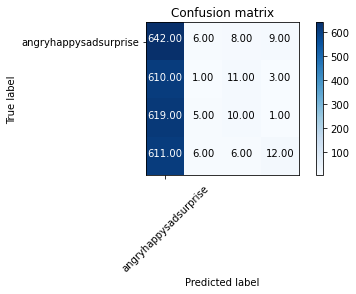

In [85]:
plot_confusion_matrix(confusion_matrix,['angry' 'happy' 'sad' 'surprise'],normalize=True)

In [86]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_labels, predictions)
print('Accuracy:',accuracy*100)

Accuracy: 25.9765625


In [87]:
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
 
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [88]:
image_size = len(image_list)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 
aug = ImageDataGenerator(
rotation_range=25, width_shift_range=0.1,
height_shift_range=0.1, shear_range=0.2, 
zoom_range=0.2,horizontal_flip=True, 
fill_mode="nearest")
model = Sequential()
inputShape = (height, width, 3)
 
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32,(3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))
model.summary()
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
 
model.compile(optimizer= "adam",loss="binary_crossentropy",metrics=["accuracy"])
# train the network
print("[INFO] training network...")

history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )


['angry' 'happy' 'sad' 'surprise']
[INFO] Spliting data to train, test
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 156, 156, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 156, 156, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 156, 156, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 52, 52, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 52, 52, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________

In [89]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
2560/2560 [==============================] - 124s 48ms/step
Test Accuracy: 73.095703125
